In [2]:
#Final Project
#The Last column of our data will hold 0 for <=50k & 1 for >50k
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from pylab import show
import test
from sklearn.model_selection import cross_val_score

# Imports Models Used
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.decomposition import PCA, KernelPCA  # Kernel Pincipal Component Analysis


In [3]:
#Loading the data
adultData = pd.read_csv("adult.data",header= None,engine='python',delimiter=',',skipinitialspace=True)
adultData = adultData.T


In [4]:
#Adjusting Work Class:
a = ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", 
     "Local-gov", "State-gov", "Without-pay", "Never-worked"]

for i in range(adultData.shape[1]):
    try:
        adultData.loc[1,i] = (a.index(adultData.loc[1,i])) + 1
    except:
        adultData.loc[1,i] = 0



In [5]:
#Adjusting Educational Level:
#*Less than HS will be 0
b = ["Bachelors", "Some-college", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate", "Preschool"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[3,i] = (b.index(adultData.loc[3,i])) + 1
    except:
        adultData.loc[3,i] = 0


In [6]:
#Adjusting Marital-Status
c = ["Married-civ-spouse", "Divorced", "Never-married", "Separated", 
     "Widowed", "Married-spouse-absent", "Married-AF-spouse"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[5,i] = (c.index(adultData.loc[5,i])) + 1
    except:
        adultData.loc[5,i] = 0

In [7]:
#Adjusting Occupation
d = ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
     "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[6,i] = (d.index(adultData.loc[6,i])) + 1
    except:
        adultData.loc[6,i] = 0

In [8]:
#Adjusting relationship
e = ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[7,i] = (e.index(adultData.loc[7,i])) + 1
    except:
        adultData.loc[7,i] = 0

In [9]:
#Adjusting Race
f = ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"]
for i in range(adultData.shape[1]):
    if adultData.loc[8,i] != "Other":
        adultData.loc[8,i] = (f.index(adultData.loc[8,i])) + 1
    else:
        adultData.loc[8,i] = 0


In [10]:
#Adjusting sex
for i in range(adultData.shape[1]):
    if adultData.loc[9,i] == "Male":
        adultData.loc[9,i] = 0
    else:
        adultData.loc[9,i] = 1

In [11]:
#Adjusting Native Country
g = ["United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India",
     "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France",
     "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland",
     "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[13,i] = (g.index(adultData.loc[13,i])) + 1
    except:
        adultData.loc[13,i] = 0

In [12]:
#Code to be run after all data is appropriately adjusted.
features = []
digits = []

for i in range(adultData.shape[1]):
    features.append(adultData[i].iloc[:-1])
    digits.append(adultData[i].iloc[-1])
 

In [13]:
for i in range(len(digits)):
    if digits[i] == "<=50K":
        digits[i] = 0
    else:
        digits[i] = 1

In [14]:
#Split the Data in an 80/20 - Testing/Training

numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigit = digits[numTrain:]

In [17]:
#Colors will be passed to the graphing library to color the points.  
colors = [] 

for index in range(len(trainFeatures)):
    # Salary over 50k are blue: "b" and salary under 50k  are red: "r"
    if(trainDigits[index] == 0):
        colors.append("r")
    else:
        colors.append("b")

# Kernel PCA

Blue dots are people that make over 50k and red dots are people who make under 50k.

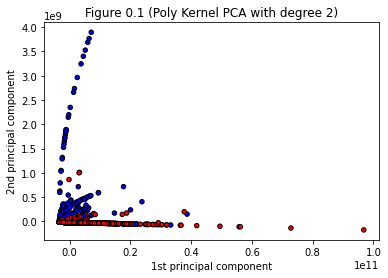

In [44]:
# Poly Kernel PCA with degree 2 
kpca = KernelPCA(n_components = 2, kernel = "poly", degree = 2)

X_kpca = kpca.fit_transform(trainFeatures)

Xk = [] 
Yk = []

for i in range(len(X_kpca)): 
    Xk.append(X_kpca[i][0]) 
    Yk.append(X_kpca[i][1])

#Plot Results 
mp.scatter(Xk, Yk, c = colors, s = 20, edgecolor = 'k')
mp.xlabel("1st principal component")
mp.ylabel("2nd principal component") 
mp.title("Figure 0.1 (Poly Kernel PCA with degree 2)") 
mp.show()


# KNN TESTING

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.71 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.75 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.77 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.78 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.79 (+/- 0.01)


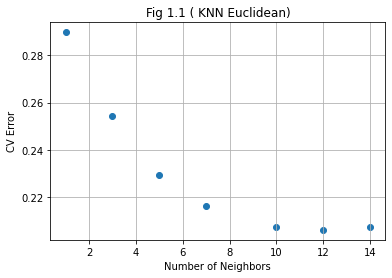

In [42]:
## KNN testing using Euclidean distance
numOfNeighbors = [1,3,5,7,10,12,14]
KnnEuclidean = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i),trainFeatures,trainDigits,cv=10)
    KnnEuclidean.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.1 ( KNN Euclidean)') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.72 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.75 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.77 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.79 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.79 (+/- 0.01)


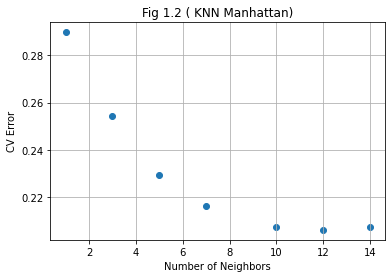

In [43]:
## KNN testing using Manhattan distance
KnnManhattan = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i,p=1),trainFeatures,trainDigits,cv=10)
    KnnManhattan.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.2 ( KNN Manhattan)') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.71 (+/- 0.03)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.75 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.77 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.78 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.79 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.79 (+/- 0.01)


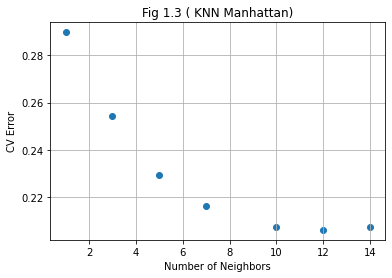

In [44]:
## KNN testing using Chebyshev distance
KnnChebyshev = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i,p=3),trainFeatures,trainDigits,cv=10)
    KnnChebyshev.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.3 ( KNN Manhattan)') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()


**KNN Results:** as we see in the above, the Distance parameter has no effect on the accuracy of the model, and the number of neighbors increases our accuracy linearly until it the accuracy trails of at 10 neighbors.

In [46]:
#Optimal KNN Test Score
cls = KNeighborsClassifier(n_neighbors = 12)
cls.fit(trainFeatures,trainDigits)

print("Accuracy of KNN using test data: %0.3f" % cls.score(testFeatures,testDigit))

Accuracy of KNN using test data: 0.790


# Neural Network Testing

Accuracy : (Layers = 1 | Nodes = 1) : 0.76 (+/- 0.01)
Accuracy : (Layers = 1 | Nodes = 2) : 0.76 (+/- 0.00)
Accuracy : (Layers = 1 | Nodes = 5) : 0.76 (+/- 0.03)
Accuracy : (Layers = 1 | Nodes = 10) : 0.72 (+/- 0.22)
Accuracy : (Layers = 1 | Nodes = 12) : 0.72 (+/- 0.27)
Accuracy : (Layers = 1 | Nodes = 14) : 0.69 (+/- 0.32)


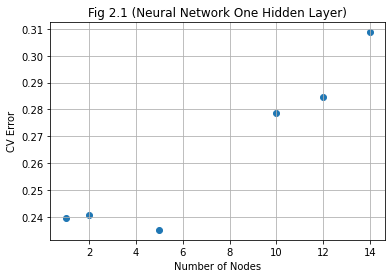

In [47]:
hiddenLayer = [1,2,5,7,9]
numNodes = [1,2,5,10,12,14]

# 1 layer for all nodes
oneHiddenLayerError = []

for i in numNodes:
    scores = cross_val_score(MLPClassifier(hidden_layer_sizes = (hiddenLayer[0],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam"),trainFeatures,trainDigits,cv=10)
    oneHiddenLayerError.append(1 - scores.mean())
    print("Accuracy : (Layers = 1 | Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numNodes, oneHiddenLayerError) 
mp.title('Fig 2.1 (Neural Network One Hidden Layer)') 
mp.xlabel('Number of Nodes') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Layers = 2 | Nodes = 1) : 0.76 (+/- 0.00)
Accuracy : (Layers = 2 | Nodes = 2) : 0.76 (+/- 0.02)
Accuracy : (Layers = 2 | Nodes = 5) : 0.73 (+/- 0.19)
Accuracy : (Layers = 2 | Nodes = 10) : 0.74 (+/- 0.14)
Accuracy : (Layers = 2 | Nodes = 12) : 0.76 (+/- 0.03)
Accuracy : (Layers = 2 | Nodes = 14) : 0.75 (+/- 0.12)


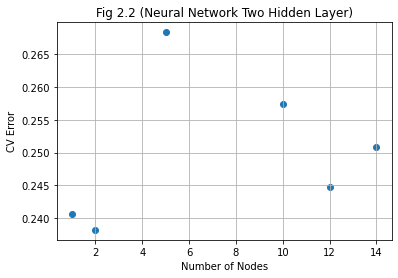

In [49]:
# 2 layer for all nodes
twoHiddenLayerError = []

for i in numNodes:
    scores = cross_val_score(MLPClassifier(hidden_layer_sizes = (hiddenLayer[1],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam"),trainFeatures,trainDigits,cv=10)
    twoHiddenLayerError.append(1 - scores.mean())
    print("Accuracy : (Layers = 2 | Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numNodes, twoHiddenLayerError) 
mp.title('Fig 2.2 (Neural Network Two Hidden Layer)') 
mp.xlabel('Number of Nodes') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Layers = 5 | Nodes = 1) : 0.76 (+/- 0.00)
Accuracy : (Layers = 5 | Nodes = 2) : 0.74 (+/- 0.13)
Accuracy : (Layers = 5 | Nodes = 5) : 0.79 (+/- 0.04)
Accuracy : (Layers = 5 | Nodes = 10) : 0.73 (+/- 0.25)
Accuracy : (Layers = 5 | Nodes = 12) : 0.67 (+/- 0.42)
Accuracy : (Layers = 5 | Nodes = 14) : 0.70 (+/- 0.31)


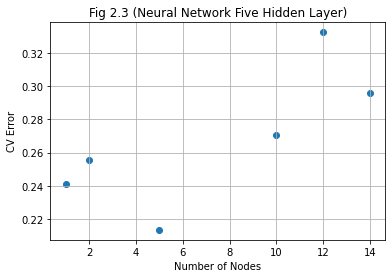

In [50]:
# 5 layer for all nodes
fiveHiddenLayerError = []

for i in numNodes:
    scores = cross_val_score(MLPClassifier(hidden_layer_sizes = (hiddenLayer[2],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam"),trainFeatures,trainDigits,cv=10)
    fiveHiddenLayerError.append(1 - scores.mean())
    print("Accuracy : (Layers = 5 | Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numNodes, fiveHiddenLayerError) 
mp.title('Fig 2.3 (Neural Network Five Hidden Layer)') 
mp.xlabel('Number of Nodes') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Layers = 7 | Nodes = 1) : 0.76 (+/- 0.00)
Accuracy : (Layers = 7 | Nodes = 2) : 0.77 (+/- 0.03)
Accuracy : (Layers = 7 | Nodes = 5) : 0.72 (+/- 0.31)
Accuracy : (Layers = 7 | Nodes = 10) : 0.74 (+/- 0.19)
Accuracy : (Layers = 7 | Nodes = 12) : 0.74 (+/- 0.21)
Accuracy : (Layers = 7 | Nodes = 14) : 0.76 (+/- 0.22)


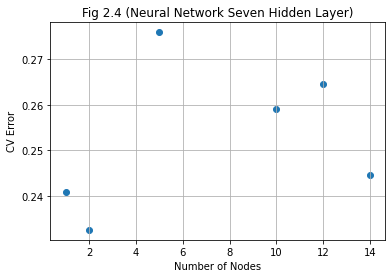

In [51]:
# 7 layer for all nodes
sevenHiddenLayerError = []

for i in numNodes:
    scores = cross_val_score(MLPClassifier(hidden_layer_sizes = (hiddenLayer[3],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam"),trainFeatures,trainDigits,cv=10)
    sevenHiddenLayerError.append(1 - scores.mean())
    print("Accuracy : (Layers = 7 | Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numNodes, sevenHiddenLayerError) 
mp.title('Fig 2.4 (Neural Network Seven Hidden Layer)') 
mp.xlabel('Number of Nodes') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Layers = 9 | Nodes = 1) : 0.76 (+/- 0.00)
Accuracy : (Layers = 9 | Nodes = 2) : 0.73 (+/- 0.28)
Accuracy : (Layers = 9 | Nodes = 5) : 0.71 (+/- 0.25)
Accuracy : (Layers = 9 | Nodes = 10) : 0.63 (+/- 0.41)
Accuracy : (Layers = 9 | Nodes = 12) : 0.78 (+/- 0.08)
Accuracy : (Layers = 9 | Nodes = 14) : 0.79 (+/- 0.03)


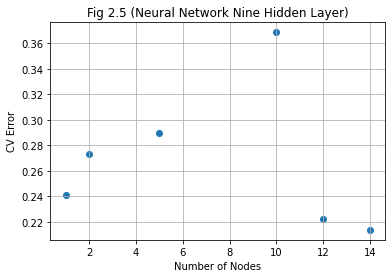

In [52]:
# 9 layer for all nodes
nineHiddenLayerError = []

for i in numNodes:
    scores = cross_val_score(MLPClassifier(hidden_layer_sizes = (hiddenLayer[4],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam"),trainFeatures,trainDigits,cv=10)
    nineHiddenLayerError.append(1- scores.mean())
    print("Accuracy : (Layers = 9 | Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numNodes, nineHiddenLayerError) 
mp.title('Fig 2.5 (Neural Network Nine Hidden Layer)') 
mp.xlabel('Number of Nodes') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Neural Network Results: The best optimal model for Neural Network for our data is using two hidden layers with two nodes. Using two hidden layers gave the most consistent high accuracy 

In [53]:
# Optimal Neural Network Test Score
cls = MLPClassifier(hidden_layer_sizes = (hiddenLayer[4],i), activation = "relu", epsilon=0.001 , max_iter=10000 , alpha=0, solver = "adam").fit(trainFeatures,trainDigits)

print("Accuracy of Neural Network using test data: %0.3f" % cls.score(testFeatures,testDigit))

Accuracy of Neural Network using test data: 0.783


# Decision Trees

Accuracy : (Max Leaf Nodes = 5) : 0.84 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 10) : 0.84 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 15) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 20) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 30) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 40) : 0.84 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 50) : 0.84 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 75) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 200) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 500) : 0.82 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000) : 0.81 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10000) : 0.81 (+/- 0.02)


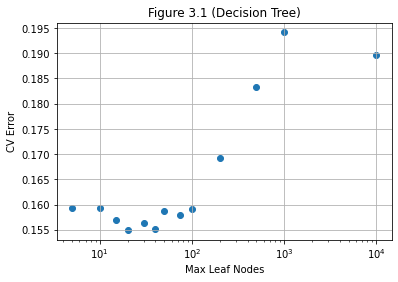

In [17]:
# Decision Tree CV Error VS Leaf Nodes
cvError = []
leafNodeValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of mex leaf nodes in decision trees
for i in leafNodeValues:
    scores = cross_val_score(DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i), trainFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(leafNodeValues, cvError)
mp.title('Figure 3.1 (Decision Tree)')
mp.xlabel('Max Leaf Nodes')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Decision Tree Results: The best parameters for the optimal Decision tree would have to be 20 max leaf nodes that gave the lowest CV error 

In [18]:
# Optimal Decision Tree with 20 Max Leaf Nodes Test Score
cls = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 20).fit(trainFeatures, trainDigits)
print("Accuracy of Decision Tree using test data: %0.3f" % cls.score(testFeatures,testDigit))

Accuracy of Decision Tree using test data: 0.851


# Random Forest

Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  5) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  10) : 0.85 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  15) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  20) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  30) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  40) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  50) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  75) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  100) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  200) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  500) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  1000) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  10000) : 0.85 (+/- 0.02)


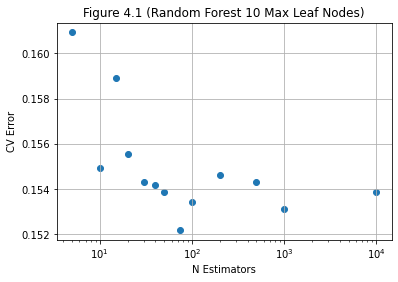

In [14]:
# Random Forest Classifier for 10 Max Leaf Nodes 
cvError = []
nEstimatorValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of n estimators in random forest classifier
for i in nEstimatorValues:
    scores = cross_val_score(RandomForestClassifier(n_estimators = i, criterion = "entropy", max_leaf_nodes = 10), trainFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = 10 | N-Estimators =  %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(nEstimatorValues, cvError)
mp.title('Figure 4.1 (Random Forest 10 Max Leaf Nodes)')
mp.xlabel('N Estimators')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  5) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  10) : 0.85 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  15) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  20) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  30) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  40) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  50) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  75) : 0.86 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  100) : 0.86 (+/- 0.03)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  200) : 0.86 (+/- 0.03)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  500) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  1000) : 0.85 (+/- 0.03)
Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  10000) : 0.86 (+/- 0.03)


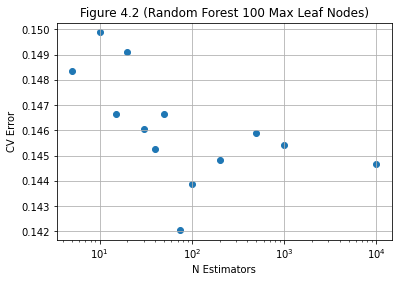

In [15]:
# Random Forest Classifier for 100 Max Leaf Nodes 
cvError = []
nEstimatorValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of n estimators in random forest classifier
for i in nEstimatorValues:
    scores = cross_val_score(RandomForestClassifier(n_estimators = i, criterion = "entropy", max_leaf_nodes = 100), trainFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = 100 | N-Estimators =  %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(nEstimatorValues, cvError)
mp.title('Figure 4.2 (Random Forest 100 Max Leaf Nodes)')
mp.xlabel('N Estimators')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  5) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  10) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  15) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  20) : 0.84 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  30) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  40) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  50) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  75) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  100) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  200) : 0.85 (+/- 0.03)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  500) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  1000) : 0.85 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  10000) : 0.85 (+/- 0.02)


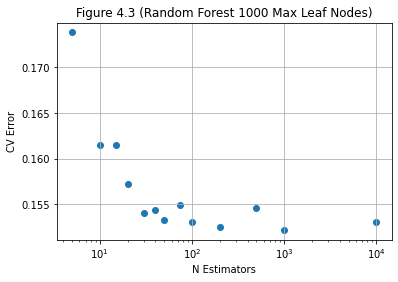

In [16]:
# Random Forest Classifier for 1000 Max Leaf Nodes 
cvError = []
nEstimatorValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of n estimators in random forest classifier
for i in nEstimatorValues:
    scores = cross_val_score(RandomForestClassifier(n_estimators = i, criterion = "entropy", max_leaf_nodes = 1000), trainFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = 1000 | N-Estimators =  %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(nEstimatorValues, cvError)
mp.title('Figure 4.3 (Random Forest 1000 Max Leaf Nodes)')
mp.xlabel('N Estimators')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

The optimal model for Random Forest Tree is 100 Max Leaf Nodes and 75 N-estimators. Any more Max Leaf Nodes does not improve accuracy. Same goes for N-Estimators.

In [14]:
# Optimal Random Forest Tree with 100 Max Leaf Nodes and 75 N-estimators Test Score
cls = RandomForestClassifier(n_estimators = 75, criterion = "entropy", max_leaf_nodes = 100).fit(trainFeatures, trainDigits)
print("Accuracy of Random Forest Tree using test data: %0.3f" % cls.score(testFeatures,testDigit))

Accuracy of Random Forest Tree using test data: 0.859


# Gaussian Naive Bayes

In [17]:
# Gaussian Naive Bayes
cls = GaussianNB().fit(trainFeatures, trainDigits) # Fit model

# Get accuracy of training data
scores = cross_val_score(GaussianNB(), trainFeatures, trainDigits, cv = 10)
print("Accuracy of Gaussian Naive Bayes using training data: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Get Accuracy of test data
print("Accuracy of Gaussian Naive Bayes using test data: %0.3f" % cls.score(testFeatures,testDigit))

Accuracy of Gaussian Naive Bayes using training data: 0.80 (+/- 0.02)
Accuracy of Gaussian Naive Bayes using test data: 0.799
